In [3]:
#!/usr/bin/env python
import matplotlib.pyplot as plt
import prettyplotlib as pplt
import plotly.plotly as ply
from plotly.graph_objs import *
import time
import pandas, matplotlib, json, urllib, numpy, PIL
from PIL import Image as img
import matplotlib.pyplot as plt
from IPython.display import SVG, Image, HTML
from PIL.ExifTags import TAGS
import pandas as pd
def nhtsa_makes_for_year(modelYear):
    """
    """
    form = {"format": 'json'}
    base_url = "http://www.nhtsa.gov/webapi/api/Recalls/vehicle/"
    model_year = "modelyear/"+str(modelYear)+'/'
    query = urllib.urlencode(form)
    nhtsa_query=(base_url+model_year+"?"+query)
    print(nhtsa_query)
    raw_response=urllib.urlopen(nhtsa_query)
    response=json.loads(raw_response.read())
    return response
def nhtsa_models_for_year(modelYear, make):
    """
    """
    form = {"format": 'json'}
    base_url = "http://www.nhtsa.gov/webapi/api/Recalls/vehicle/"
    model_year = "modelyear/"+str(modelYear)+'/'
    make = "make/"+str(make)+"/"
    query =urllib.urlencode(form)
    nhtsa_query=(base_url+model_year+make+"?"+query)
    print(nhtsa_query)
    raw_response=urllib.urlopen(nhtsa_query)
    response=json.loads(raw_response.read())
    return response
def nhtsa_year_model(modelYear, make, model):
    """
    """
    form = {'year': modelYear, 'make': make, 'model': model, "format": 'json'}
    base_url = "http://www.nhtsa.gov/webapi/api/Recalls/vehicle"
    #model_year = "modelyear/"+str(modelYear)+'/'
    #make = "make/"+str(make)+"/"
    #model = "model/"+str(model)
    query = urllib.urlencode(form)
    #nhtsa_query=(base_url+model_year+make+model+"?"+query)
    nhtsa_query=(base_url+'?'+query)
    print(nhtsa_query)
    raw_response=urllib.urlopen(nhtsa_query)
    response=json.loads(raw_response.read())
    return response
def plot_year(year):
    ply.sign_in('jessembacon', 'fua03q4wye')
    year_makes=nhtsa_makes_for_year(year)
    makes=[]
    for i in range(len(year_makes['Results'])):
        makes.append(year_makes['Results'][i]['Make'])
    models = []
    trouble_makes=[]
    for make in makes:
        try:
            model=nhtsa_models_for_year(year, make)
            for item in model['Results']:
                models.append([item['Make'], item['Model'], item['ModelYear']])
        except:
            print("Could not retrieve recalls for %s" % make)
            trouble_makes.append([make, year])
    makes_dbs={}
    exclude = set([' ','-','/','\\','&'])
    for item in makes:
        item = str(item).replace(" ","").replace('-','_').replace('\\','').replace('//','').replace('\/','').replace('&','')
        makes_dbs[item]=0
    for item in models:
        try:
            print(item)
            make_name=(str(item[0]).replace(" ","").replace('-','_').replace('\\','').replace('//','').replace('\/','').replace('&',''))
            print(make_name)
            entry=nhtsa_year_model(item[2], item[0], item[1])
            print(entry['Count'])
            makes_dbs[make_name]+=entry['Count']
            time.sleep(0.25)
        except:
            print("Unable to count %s" % make_name) 
    a=makes_dbs.keys()
    b=makes_dbs.values()
    df=pd.DataFrame.from_dict(makes_dbs, 'index')
    df.columns=['Counts']
    fig=plt.figure()
    plt.plot(b, label=year)
    plt.title('Number of Recall Types Per Maker %s'%(year))
    plt.xlabel('Makers')
    plt.ylabel=('Recall Types')
    plt.legend()
    figname=str(year)+'.png'
    plt.savefig( figname, transparent=True)
    trace1 = Scatter(
    x=a,
    y=b
    )
    #trace2 = Scatter(
    #    x=[1, 2, 3, 4],
    #    y=[16, 5, 11, 9]
    #)
    data = Data([trace1])
    plot_url = ply.plot(data, filename='Number of Recall Types Per Maker %s'%(year))
    return trace1
def plot_year_no_web(year):
    year_makes=nhtsa_makes_for_year(year)
    makes=[]
    for i in range(len(year_makes['Results'])):
        makes.append(year_makes['Results'][i]['Make'])
    models = []
    trouble_makes=[]
    for make in makes:
        try:
            model=nhtsa_models_for_year(year, make)
            for item in model['Results']:
                models.append([item['Make'], item['Model'], item['ModelYear']])
        except:
            print("Could not retrieve recalls for %s" % make)
            trouble_makes.append([make, year])
    makes_dbs={}
    exclude = set([' ','-','/','\\','&'])
    for item in makes:
        item = str(item).replace(" ","").replace('-','_').replace('\\','').replace('//','').replace('\/','').replace('&','')
        makes_dbs[item]=0
    for item in models:
        try:
            print(item)
            make_name=(str(item[0]).replace(" ","").replace('-','_').replace('\\','').replace('//','').replace('\/','').replace('&',''))
            print(make_name)
            entry=nhtsa_year_model(item[2], item[0], item[1])
            print(entry['Count'])
            makes_dbs[make_name]+=entry['Count']
            time.sleep(0.25)
        except:
            print("Unable to count %s" % make_name) 
            time.sleep(0.25)
    a=makes_dbs.keys()
    b=makes_dbs.values()
    df=pd.DataFrame.from_dict(makes_dbs, 'index')
    df.columns=['Counts']
    fig=plt.figure()
    plt.plot(b, label=year)
    plt.title('Number of Recall Types Per Maker %s'%(year))
    plt.xlabel('Makers')
    plt.ylabel=('Recall Types')
    plt.legend()
    figname=str(year)+'.png'
    plt.savefig( figname, transparent=True)
    trace1 = Scatter(
    x=a,
    y=b
    )
    return trace1
def trace_multiple_years(start_year, end_year):
    traces=[]
    for year in range(start_year, end_year):
        trace_name=(str(trace)+'_'+str(year))
        print(trace_name)
        exec "%s = plot_year_no_web(year)" % (trace_name)
        exec "traces.append(%s)" % (trace_name)
    return traces
def plot_remaining_years(start_year, end_year):
    for year in range(int(start_year), int(end_year)):
        trace_name=(str('trace')+'_'+str(year))
        print(trace_name)
        exec "%s = plot_year_no_web(year)" % (trace_name)

In [4]:
%matplotlib inline

http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2016/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2016/make/AIRSTREAM/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2016/make/AMERA-LITE/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2016/make/AUTOCAR/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2016/make/BLUE BIRD/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2016/make/CADILLAC/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2016/make/CARDINAL/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2016/make/CARGO EXPRESS/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2016/make/CARGO MATE/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2016/make/CEDAR CREEK/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2016/make/COACHMEN/?format=json
http://www.

{'type': u'scatter',
 'x': ['EASTMANUFACTURING',
  'CEDARCREEK',
  'HOLIDAYRAMBLER',
  'CRUISERRV',
  'VOLVO',
  'HIGHLANDRIDGE',
  'KEYSTONE',
  'E_ONE',
  'DUTCHMEN',
  'USCARGO',
  'LANDROVER',
  'TRAILSTAR',
  'JAYCO',
  'WINNEBAGO',
  'HONDA',
  'COACHMEN',
  'CROSSROADS',
  'LAKOTA',
  'CARGOEXPRESS',
  'KIA',
  'ICBUS',
  'CONTINENTALCARGO',
  'WABASHNATIONAL',
  'HINO',
  'AIRSTREAM',
  'PALOMINO',
  'STARCRAFTBUS',
  'FONTAINE',
  'CADILLAC',
  'HEARTLAND',
  'NEWMAR',
  'FORD',
  'PETERBILT',
  'AUTOCAR',
  'ENTEGRA',
  'TRACER',
  'INTERNATIONAL',
  'FLEETWOOD',
  'MACK',
  'BLUEBIRD',
  'EVERGREEN',
  'GRANDDESIGN',
  'LOOK',
  'FORESTRIVER',
  'FREIGHTLINER',
  'NISSAN',
  'TEMSA',
  'KENWORTH',
  'THOR',
  'PACE',
  'MERCEDESBENZ',
  'CARDINAL',
  'AMERA_LITE',
  'MONACO',
  'CARGOMATE',
  'STARCRAFT',
  'SUBARU',
  'SPARTAN',
  'FELLING'],
 'y': [22,
  2,
  25,
  2,
  497,
  16,
  138,
  12,
  38,
  4,
  86,
  1,
  60,
  15,
  49,
  47,
  54,
  1,
  2,
  19,
  96,
  10,


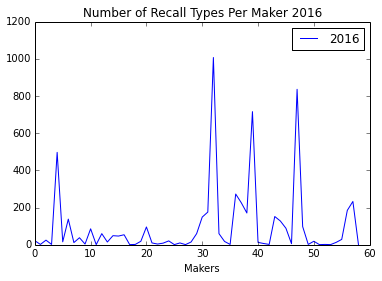

In [5]:
plot_year_no_web(2016)

http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2015/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2015/make/ACURA/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2015/make/AEV/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2015/make/AIRSTREAM/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2015/make/ALTEC/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2015/make/AMERICAN COACH/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2015/make/AMERITRANS/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2015/make/APRILIA/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2015/make/ARBOC/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2015/make/AUDI/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2015/make/AUTOCAR/?format=json
http://www.nhtsa.gov/webapi/api/Rec

{'type': u'scatter',
 'x': ['GEORGETOWN',
  'THORMOTORCOACH',
  'ALTEC',
  'HIGHLANDRIDGE',
  'INTERNATIONAL',
  'LANDROVER',
  'DODGE',
  'HYUNDAITRANSLEAD',
  'SCION',
  'JAYCO',
  'WESTERNSTAR',
  'HONDA',
  'HUSQVARNA',
  'CROSSROADS',
  'TEREXADVANCE',
  'KAWASAKI',
  'KIDRON',
  'VANCO',
  'CRUISERRV',
  'HEARTLAND',
  'PORSCHE',
  'CHARLESMACHINE',
  'ARBOC',
  'ENTEGRA',
  'APRILIA',
  'BLUEBIRD',
  'ELGIN',
  'JAGUAR',
  'LOOK',
  'TEMSA',
  'MCNEILUS',
  'NISSAN',
  'ELDORADO',
  'BRAUN',
  'THOMASBUILT',
  'PACE',
  'PALOMINO',
  'GULFSTREAM',
  'KIA',
  'AMERITRANS',
  'STARCRAFTBUS',
  'NABI',
  'CHAMPION',
  'AEV',
  'UTILIMASTER',
  'GILLIG',
  'DYNAMAX',
  'FERRARI',
  'VICTORY',
  'COLLINS',
  'DUTCHMEN',
  'KZ_RV',
  'FIAT',
  'MITSUBISHIFUSO',
  'JEEP',
  'VERMEER',
  'KEYSTONE',
  'BMW',
  'CADILLAC',
  'SUZUKI',
  'CHEVROLET',
  'WILSON',
  'VOLKSWAGEN',
  'KENWORTH',
  'KALMAR',
  'TEREX',
  'GENIE',
  'FLEETWOOD',
  'AMERICANCOACH',
  'OSHKOSH',
  'MASERATI',
  '

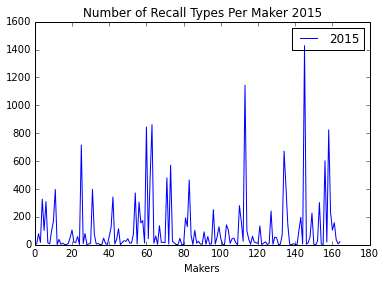

In [6]:
plot_year_no_web(2015)

http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2014/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2014/make/ACURA/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2014/make/AEV/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2014/make/AIRSTREAM/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2014/make/ALTEC/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2014/make/AMERICAN COACH/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2014/make/AMERITRANS/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2014/make/APRILIA/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2014/make/ARBOC/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2014/make/ARCTIC FOX/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2014/make/ASPEN TRAIL/?format=json
http://www.nhtsa.gov/weba

{'type': u'scatter',
 'x': ['SETRA',
  'THORMOTORCOACH',
  'ALTEC',
  'TIFFIN',
  'DRV',
  'TAKENA',
  'STEALTH',
  'MIDBUS',
  'FOXMOUNTAIN',
  'INTERNATIONAL',
  'TRANSTECH',
  'LANDROVER',
  'DODGE',
  'HYUNDAITRANSLEAD',
  'SCION',
  'JAYCO',
  'WESTERNSTAR',
  'HONDA',
  'LIBERO',
  'CROSSROADS',
  'LAKOTA',
  'SPORTSMEN',
  'VOLVO',
  'CORNPRO',
  'HACKNEY',
  'KIDRON',
  'BRAMMO',
  'CORNHUSKER',
  'FORETRAVEL',
  'HEARTLAND',
  'PORSCHE',
  'CHARLESMACHINE',
  'ICECASTLE',
  'THREEFEATHERS',
  'ARBOC',
  'ENTEGRA',
  'HOMETOWNTROLLEY',
  'COLLINS',
  'APRILIA',
  'GM',
  'RANGEROVER',
  'BLUEBIRD',
  'ELGIN',
  'JAGUAR',
  'STOUGHTON',
  'TEMSA',
  'MCNEILUS',
  'NISSAN',
  'ELDORADO',
  'BRAUN',
  'THOMASBUILT',
  'PALOMINO',
  'GULFSTREAM',
  'KIA',
  'SPARTANMOTORS',
  'AMERITRANS',
  'STARCRAFTBUS',
  'PRIMETIME',
  'NABI',
  'CHAMPION',
  'AEV',
  'SPARTAN',
  'UTILIMASTER',
  'MCLAREN',
  'MVAGUSTA',
  'GILLIG',
  'FERRARI',
  'VICTORY',
  'MCKENZIE',
  'WOLFCREEK',
  'CH

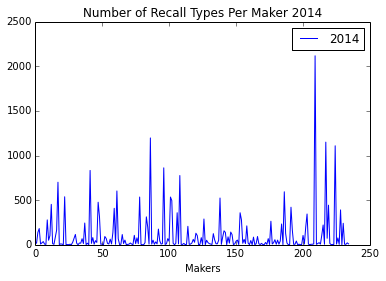

In [7]:
plot_year_no_web(2014)

http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2013/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2013/make/4-STAR/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2013/make/ACURA/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2013/make/ADAM/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2013/make/AEV/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2013/make/AIRSTREAM/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2013/make/ALINER/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2013/make/ALTEC/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2013/make/AMERICAN COACH/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2013/make/AMERITRANS/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2013/make/AMERIVAN/?format=json
http://www.nhtsa.gov/webapi/api/Re

{'type': u'scatter',
 'x': ['HAULMARK',
  'CHALET',
  'SETRA',
  'CJAY',
  'THORMOTORCOACH',
  'COLLINSMIDBUS',
  'HARLEY_DAVIDSON',
  'STARCRAFT',
  'ALTEC',
  'TIFFIN',
  'TAKENA',
  'STEALTH',
  'STARTRANS',
  'FOXMOUNTAIN',
  'WELLSCARGO',
  'TRANSTECH',
  'LANDROVER',
  'MONROE',
  'MOTOGUZZI',
  'DODGE',
  'LABOIT',
  'WILSON',
  'RENEGADE',
  'WESTMOR',
  'JAYCO',
  'TRAILSTAR',
  'HARBORVIEW',
  'ROLLS_ROYCE',
  'LIBERO',
  'CROSSROADS',
  'LAKOTA',
  'SCHWING',
  'CIRCLED',
  'KAWASAKI',
  'SPACECRAFT',
  'REGENCYGT',
  'CORNPRO',
  'RMTRAILER',
  'HACKNEY',
  'BMW',
  'BRAMMO',
  'UTEC',
  'SUPERDUTY',
  'CRUISERRV',
  'HEARTLAND',
  'PORSCHE',
  'CHARLESMACHINE',
  'THREEFEATHERS',
  'ARBOC',
  'ENTEGRA',
  'TEREXADVANCE',
  'FOURWHEELSIX_PAC',
  'HOMETOWNTROLLEY',
  'INTERNATIONAL',
  'GM',
  'VOLVO',
  'BLUEBIRD',
  'ELGIN',
  'KZRV',
  'JAGUAR',
  'TEMSA',
  'MCNEILUS',
  'NISSAN',
  'ELDORADO',
  'BRAUN',
  'THOMASBUILT',
  'EXISS',
  'PALOMINO',
  'JOMAC',
  'GULFSTREAM

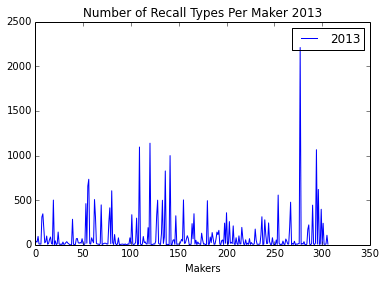

In [8]:
plot_year_no_web(2013)

http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2012/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2012/make/4-STAR/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2012/make/4-STAR TRAILERS/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2012/make/ACURA/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2012/make/ADVENTURER/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2012/make/AEV/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2012/make/AIRSTREAM/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2012/make/ALINER/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2012/make/ALTEC/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2012/make/ALUMADUMP/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2012/make/AMERITRANS/?format=json
http://www.nhtsa.gov/webap

{'type': u'scatter',
 'x': ['HAULMARK',
  'CHALET',
  'CJAY',
  'THORMOTORCOACH',
  'SHASTAREVERE',
  'HARLEY_DAVIDSON',
  'HOMETOWNTROLLEY',
  'ALTEC',
  'CIMARRON',
  'ORION',
  'TAKENA',
  'STEALTH',
  'NECKOVER',
  'ELKHARTCOACH',
  'ROCKPORT',
  'INTERNATIONAL',
  'VERMEER',
  'URAL',
  'LANDROVER',
  'TCI',
  'MONROE',
  'MOTOGUZZI',
  'DODGE',
  'UTILIMASTER',
  'WILSON',
  'MCCLAIN',
  'SCION',
  'WESTMOR',
  'JAYCO',
  'TRAILSTAR',
  'HARBORVIEW',
  'ROLLS_ROYCE',
  'LIBERO',
  'CROSSROADS',
  'VICTORY',
  'TEXASPRIDE',
  'SCHWING',
  'CIRCLED',
  'KAWASAKI',
  'SPACECRAFT',
  'REGENCYGT',
  'CORNPRO',
  'RMTRAILER',
  'INTERSTATE',
  'ROLLIGON',
  'UTEC',
  'SUPERDUTY',
  'VOLKSWAGEN',
  'WOLFCREEK',
  'CRUISERRV',
  'HEARTLAND',
  'PORSCHE',
  'CHARLESMACHINE',
  'WELLSCARGO',
  'THREEFEATHERS',
  'ARBOC',
  'ENTEGRA',
  'FOURWHEELSIX_PAC',
  'HME',
  'FALCON',
  'GM',
  'VOLVO',
  'UNIVERSALSPECIALTY',
  'BLUEBIRD',
  'ELGIN',
  'KZRV',
  'JAGUAR',
  'TEMSA',
  'MCNEILUS',


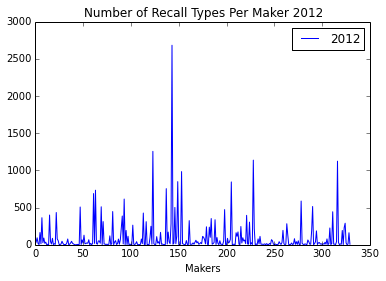

In [9]:
plot_year_no_web(2012)

http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2011/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2011/make/4-STAR/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2011/make/ADVENTURE/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2011/make/ADVENTURER/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2011/make/AEV/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2011/make/AIRSTREAM/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2011/make/ALINER/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2011/make/ALTEC/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2011/make/AMERITRANS/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2011/make/AMERIVAN/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2011/make/ANDERSON MFG/?format=json
http://www.nhtsa.gov/webap

{'type': u'scatter',
 'x': ['HAULMARK',
  'DODGE',
  'MCCLAIN',
  'EXECUTIVECOACH',
  'JAYCO',
  'WESTERNSTAR',
  'HARBORVIEW',
  'SUPERDUTY',
  'SURVEYOR',
  'ARBOC',
  'SHARP',
  'GM',
  'MULTIQUIP',
  'STOUGHTON',
  'EXPRESS',
  'CARSON',
  'ANDERSONMFG',
  'COOSETRAILER',
  'NABI',
  'PLAY_MOR',
  'MOBILITYWORKS',
  'KALMAR',
  'COWTOWNSLEEPERS',
  'JEEP',
  'WINDRIVER',
  'JETCO',
  'INDIAN',
  'ADVENTURE',
  'HITCHHIKER',
  'ROADTREK',
  'KENWORTH',
  'TEREX',
  'GENIE',
  'MARATHON',
  'PIERCE',
  'SPECIALFLEET',
  'WESTMOR',
  'PLEASANTVALLEY',
  'TIMPTE',
  'RAPISCAN',
  'CHRYSLER',
  'SHRED_TECH',
  'TAYLOR_DUNN',
  'COACHANDEQUIPMENT',
  'TIFFIN',
  'CTW',
  'EXCEL',
  'E_ONE',
  'RIVERSIDE',
  'VANHOOL',
  'AUDI',
  'LANCE',
  'CARRY_ON',
  'CAPACITY',
  'TRACKERMARINE',
  'COACHMEN',
  'MAZDA',
  'AZUREDYNAMICS',
  'ICBUS',
  'CRANE',
  'NEWMAR',
  'ELEMENT',
  'GIRARDIN',
  'MITSUBISHI',
  'TRIUMPH',
  'NEWFLYER',
  'BELMONTTRAILER',
  'TRANSTECH',
  'ADVENTURER',
  'SH',

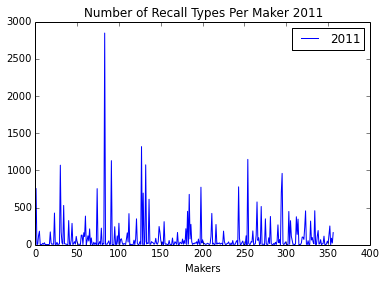

In [10]:
plot_year_no_web(2011)

In [11]:
plot_year_no_web(2017)

http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2017/?format=json


ValueError: Length mismatch: Expected axis has 0 elements, new values have 1 elements

http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2016/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2016/make/AIRSTREAM/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2016/make/AMERA-LITE/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2016/make/AUTOCAR/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2016/make/BLUE BIRD/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2016/make/CADILLAC/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2016/make/CARDINAL/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2016/make/CARGO EXPRESS/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2016/make/CARGO MATE/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2016/make/CEDAR CREEK/?format=json
http://www.nhtsa.gov/webapi/api/Recalls/vehicle/modelyear/2016/make/COACHMEN/?format=json
http://www.

{'type': u'scatter',
 'x': ['EASTMANUFACTURING',
  'CEDARCREEK',
  'HOLIDAYRAMBLER',
  'CRUISERRV',
  'VOLVO',
  'HIGHLANDRIDGE',
  'KEYSTONE',
  'E_ONE',
  'DUTCHMEN',
  'USCARGO',
  'LANDROVER',
  'TRAILSTAR',
  'JAYCO',
  'WINNEBAGO',
  'HONDA',
  'COACHMEN',
  'CROSSROADS',
  'LAKOTA',
  'CARGOEXPRESS',
  'KIA',
  'ICBUS',
  'CONTINENTALCARGO',
  'WABASHNATIONAL',
  'HINO',
  'AIRSTREAM',
  'PALOMINO',
  'STARCRAFTBUS',
  'FONTAINE',
  'CADILLAC',
  'HEARTLAND',
  'NEWMAR',
  'FORD',
  'PETERBILT',
  'AUTOCAR',
  'ENTEGRA',
  'TRACER',
  'INTERNATIONAL',
  'FLEETWOOD',
  'MACK',
  'BLUEBIRD',
  'EVERGREEN',
  'GRANDDESIGN',
  'LOOK',
  'FORESTRIVER',
  'FREIGHTLINER',
  'NISSAN',
  'TEMSA',
  'KENWORTH',
  'THOR',
  'PACE',
  'MERCEDESBENZ',
  'CARDINAL',
  'AMERA_LITE',
  'MONACO',
  'CARGOMATE',
  'STARCRAFT',
  'SUBARU',
  'SPARTAN',
  'FELLING'],
 'y': [22,
  2,
  25,
  2,
  497,
  16,
  138,
  12,
  38,
  4,
  86,
  1,
  60,
  15,
  49,
  47,
  54,
  1,
  2,
  19,
  96,
  10,


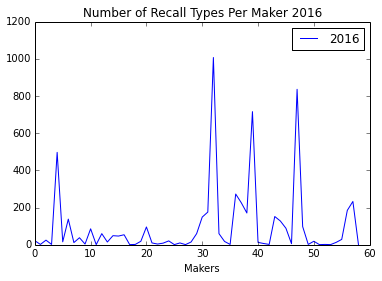

In [14]:
plot_year(2016)